# NIPS 2017 Figure 1

In [12]:
%run -i NIPS2017.ipynb

## Panel A

To modify panel a, edit: `PATH_DROPBOX_FIGS/fig1_a.svg`

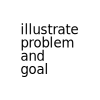

In [2]:
panel_a = PATH_DROPBOX_FIGS + 'fig1_a.svg'

svg(panel_a)

## Panel B

Inspiration:
- http://nbviewer.jupyter.org/gist/kjordahl/3947841/bootstrap.ipynb
- http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

/Applications/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GaussianProcess is deprecated; GaussianProcess was deprecated in version 0.18 and will be removed in 0.20. Use the GaussianProcessRegressor instead.
  warnings.warn(msg, category=DeprecationWarning)
/Applications/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function l1_cross_distances is deprecated; l1_cross_distances was deprecated in version 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


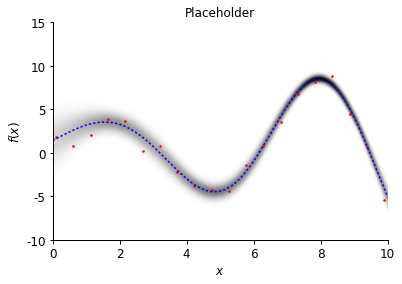

In [3]:
from scipy import ndimage
from sklearn.gaussian_process import GaussianProcess

def pdense(x, y, sigma, M=1000):
    """ Plot probability density of y with known stddev sigma
    """
    assert len(x) == len(y) and len(x) == len(sigma)
    N = len(x)
    # TODO: better y ranging
    ymin, ymax = min(y - 2 * sigma), max(y + 2 * sigma)
    yy = np.linspace(ymin, ymax, M)
    a = [np.exp(-((Y - yy) / s) ** 2) / s for Y, s in zip(y, sigma)]
    A = np.array(a)
    A = A.reshape(N, M)
    plt.imshow(-A.T, cmap='gray', aspect='auto',
               origin='lower', extent=(min(x)[0], max(x)[0], ymin, ymax))
    plt.title('Placeholder')
    

def gpr(seed=0, N=20, M=1000, sigma=1.0):
    """ from scikits.learn demo
    """
    np.random.seed(seed)

    def f(x):
        """The function to predict."""
        return x * np.sin(x)
    
    X = np.linspace(0.1, 9.9, 20)
    X = np.atleast_2d(X).T
    y = f(X).ravel()
    y = np.random.normal(y, sigma)
    x = np.atleast_2d(np.linspace(0, 10, M)).T
    nugget = (sigma / y) ** 2
    gp = GaussianProcess(corr='squared_exponential', theta0=1e-1,
                         thetaL=1e-1, thetaU=1.0,
                         nugget=nugget,
                         random_start=100)
    gp.fit(X, y)
    y2, MSE = gp.predict(x, eval_MSE=True)
    s2 = np.sqrt(MSE)
    return X, y, x, y2, s2

X, y, x, y2, s2 = gpr(seed=0)
plt.figure(1)
pdense(x, y2, s2, M=1000)
plt.plot(X, y, 'r.')
plt.plot(x, y2, 'b:')
a = plt.gca()
a.set_ylim(-10, 15)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

panel_b = PATH_DROPBOX_FIGS + 'fig1_b.svg'
plt.savefig(panel_b)

## Panel C

To modify panel a, edit: `PATH_DROPBOX_FIGS/fig1_b.svg`

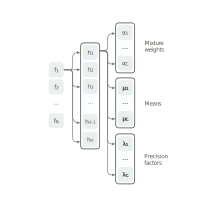

In [4]:
panel_c = PATH_DROPBOX_FIGS + 'fig1_c.svg'
svg(panel_c)

## Put together figure

In [13]:
# FIGURE

FIG_HEIGHT = 6.5
FIG_HEIGHT_CM = str(FIG_HEIGHT) + "cm"
FIG_HEIGHT_PX = cm2px(FIG_HEIGHT)
# Note: FIG_WIDTH, FIG_WIDTH_CM, FIG_WIDTH_PX are constant for all figures

fig = sg.SVGFigure(FIG_WIDTH_CM, FIG_HEIGHT_CM)


# GRID (sloppy)

rows = 1

row1_cols  = 3
row1_width_per_col   = int(np.floor(FIG_WIDTH_PX / row1_cols))

height_per_row = int(cm2px(6.5)/rows)


# PANELS

pa = sg.fromfile(panel_a).getroot()
pb = sg.fromfile(panel_b).getroot()
pc = sg.fromfile(panel_c).getroot()

xoffset = 15
yoffset = 10
pa.moveto(0*row1_width_per_col + xoffset, yoffset, scale=1.)
pb.moveto(1*row1_width_per_col + xoffset, yoffset, scale=1.)
pc.moveto(2*row1_width_per_col + xoffset, yoffset, scale=1.)

fig.append([pa, pb, pc])


# LABELS

xoffset   = 10
yoffset   = 15
fig.append(sg.TextElement(0*row1_width_per_col + xoffset, 0*height_per_row + yoffset,  "A", size=FONT_SIZE_PANEL, weight="bold"))
fig.append(sg.TextElement(1*row1_width_per_col + xoffset, 0*height_per_row + yoffset,  "B", size=FONT_SIZE_PANEL, weight="bold"))
fig.append(sg.TextElement(2*row1_width_per_col + xoffset, 0*height_per_row + yoffset,  "C", size=FONT_SIZE_PANEL, weight="bold"))


# HACKS
# proper final svg size
fig.append(sg.TextElement(0, 0,  ".", size=1, weight="bold"))
fig.append(sg.TextElement(FIG_WIDTH_PX, FIG_HEIGHT_PX,  ".", size=1, weight="bold"))

# SAVE
PATH_SVG = PATH_DROPBOX_FIGS + 'fig1.svg'
fig.save(PATH_SVG)

# CONVERT
!$INKSCAPE -D -z --export-pdf $PATH_DROPBOX_FIGS/fig1.pdf $PATH_SVG

print('Done')

Done
